## 8.LDA (Latent Dirichlet Allocation) Topic Modelling


[Data Source](https://www.kaggle.com/suleymancan/turkishnews70000)

"PİAR Araştırma: Adana ve Antalyada millet ittifakı’ avantajlı konumda 04/03/2019 14:21\nPİAR Araştırma’nın Akdeniz bölgesinde yürüttüğü ankete göre Kahramanmaraşta ‘ cumhur ittifakı ‘ ve Ispar...

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('turkish_news_70000.csv')

# First 5 line
df.head(5)

,id,main_image,published,site,text,title,url
0,72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
1,72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
2,72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."
3,72340,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:53:00.000+02:00""","""diken.com.tr""","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""http://www.diken.com.tr/agridaki-iyi-partilil..."
4,72341,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:52:00.000+02:00""","""diken.com.tr""","""Otomobil pazarı iki ayda yarı yarıya eridi 04...","""Otomobil pazarı iki ayda yarı yarıya eridi""","""http://www.diken.com.tr/otomobil-pazari-iki-a..."


In [6]:
# Only text column will be used for LDA model.
news_dataset_df = df[['text']]
news_dataset_df.head(5)

,text
0,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
1,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
2,"""Renaissance Capital: Merkez Bankası bu hafta ..."
3,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ..."
4,"""Otomobil pazarı iki ayda yarı yarıya eridi 04..."


## Data Cleaning
1. Apply lower case for news.
2. Remove punctuations.
3. Remove stopwords.

In [37]:
# Let's create a method for data cleaning.
# Apply this method to our data.
# Define punctuations and stopwords.

import re
import string
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

punctuations_set = string.punctuation
# use nltk library for ineffective words (stop words).
stop_words_set = stopwords.words('turkish')
# we can add words to this set
stop_words_set.extend(["bir", "kadar", "sonra"])

def CleanData(text):
 # Make all letters lowercase
 text = text.lower()
 # Change new line characters to the space
 text = text.replace("\\n", " ")
 # Remove apostrophe and character that after comes.
 text = re.sub("’(\w+)", "", text)
 text = re.sub("'(\w+)", "", text)
 text = re.sub("[“,‘,’,”]", "", text)


 # Discards numbers
 text = re.sub("[0-9]+", "", text)
 # Remove punctuations
 text = "".join(list(map(lambda x:x if x not in punctuations_set else " ", text)))
 # Remove some of ineffective words
 text = " ".join([i for i in text.split() if i not in stop_words_set])
 # Remove single characters
 text = " ".join([i for i in text.split() if len(i) > 1])

 return text

In [38]:
news_dataset_df["cleaned_set"] = news_dataset_df["text"].apply(lambda x:CleanData(x))

C:\Users\tyyp-\AppData\Local\Temp/ipykernel_26072/2565694156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset_df["cleaned_set"] = news_dataset_df["text"].apply(lambda x:CleanData(x))


In [39]:
news_dataset_df.iloc[5]['text']

'"Şubat ayında ihracat yüzde 3.7 arttı, ithalat yüzde 18.7 azaldı 04/03/2019 12:20\\nTicaret Bakanı Ruhsar Pekcan şubat ayında ihracatın yüzde 3.7 artışla 14 milyar 312 milyon dolar, ithalatın yüzde 18.7 azalışla 16 milyar 161 milyon dolar olarak gerçekleştiğini açıkladı. Fotoğraf: Reuters\\nBakan Pekcan şunları söyledi: “ Eskiden kullandığımız Özel Ticaret Sistemine göre de şubat ayında ihracatımız yüzde 3,5 artışla 13 milyar 603 milyon dolar olarak gerçekleşmiştir. ÖTS’ye göre ithalatımız şubat ayında yüzde 16,6 düşüşle 15 milyar 793 milyon dolar seviyesinde gerçekleşmiştir. ” Reklam"'

In [40]:
news_dataset_df.iloc[5]['cleaned_set']

'şubat ayında ihracat yüzde arttı ithalat yüzde azaldı ticaret bakanı ruhsar pekcan şubat ayında ihracatın yüzde artışla milyar milyon dolar ithalatın yüzde azalışla milyar milyon dolar olarak gerçekleştiğini açıkladı fotoğraf reuters bakan pekcan şunları söyledi eskiden kullandığımız özel ticaret sistemine göre şubat ayında ihracatımız yüzde artışla milyar milyon dolar olarak gerçekleşmiştir öts göre ithalatımız şubat ayında yüzde düşüşle milyar milyon dolar seviyesinde gerçekleşmiştir reklam'

# Tokenization


In [41]:
news_dataset_df['cleaned_set_tokenized'] = news_dataset_df['cleaned_set'].apply(lambda x: x.split())
news_dataset_df.head(5)

C:\Users\tyyp-\AppData\Local\Temp/ipykernel_26072/3821393779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset_df['cleaned_set_tokenized'] = news_dataset_df['cleaned_set'].apply(lambda x: x.split())


,text,cleaned_set,cleaned_set_tokenized
0,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...",yatırım bankası dolar tl üçüncü çeyrekte görec...,"[yatırım, bankası, dolar, tl, üçüncü, çeyrekte..."
1,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i...",pi̇ar araştırma adana antalya millet ittifakı ...,"[pi̇ar, araştırma, adana, antalya, millet, itt..."
2,"""Renaissance Capital: Merkez Bankası bu hafta ...",renaissance capital merkez bankası hafta baz p...,"[renaissance, capital, merkez, bankası, hafta,..."
3,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...",ağrı i̇yi̇ partililerin istifa gerekçesi akp s...,"[ağrı, i̇yi̇, partililerin, istifa, gerekçesi,..."
4,"""Otomobil pazarı iki ayda yarı yarıya eridi 04...",otomobil pazarı iki ayda yarı yarıya eridi oto...,"[otomobil, pazarı, iki, ayda, yarı, yarıya, er..."


# LDA Model Training

In [ ]:
import gensim
import pyLDAvis.gensim_models # LDA topic model for figures

In [ ]:
# Word list - Dictionarytokenized_text = news_dataset_df["cleaned_set_tokenized"]
tokenized_text = news_dataset_df['cleaned_set_tokenized']
word_list = gensim.corpora.Dictionary(tokenized_text)

# Filtering word list
word_list.filter_extremes(no_below=1, no_above=0.7)

In [ ]:
# Vectorize terms -- Creating document-term matrix
document_term_matrix = [word_list.doc2bow(term) for term in tokenized_text]

In [ ]:
# LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus= document_term_matrix,
                                            id2word= word_list,
                                            num_topics= 15,
                                            passes=10)

## Results

In [52]:
# Most founded terms within created topics
topics = lda_model.print_topics(num_words = 7)

for topic in topics:
 print(topic)

(0, '0.027*"chp" + 0.024*"belediye" + 0.019*"başkan" + 0.019*"parti" + 0.018*"başkanı" + 0.015*"adayı" + 0.011*"seçim"')
(1, '0.126*"xx" + 0.041*"hürriyet" + 0.036*"xxx" + 0.016*"tatil" + 0.015*"lüks" + 0.014*"co" + 0.011*"gazetesi"')
(2, '0.042*"yorum" + 0.034*"yorumlar" + 0.029*"com" + 0.027*"haberturk" + 0.017*"sayfalarında" + 0.015*"şekilde" + 0.014*"türkiye"')
(3, '0.017*"i̇stanbul" + 0.013*"hava" + 0.011*"yer" + 0.010*"kar" + 0.007*"deprem" + 0.007*"son" + 0.006*"nedeniyle"')
(4, '0.008*"türkiye" + 0.008*"eğitim" + 0.007*"olan" + 0.007*"kadın" + 0.007*"olarak" + 0.007*"türk" + 0.006*"ilk"')
(5, '0.011*"tl" + 0.010*"olarak" + 0.007*"olan" + 0.005*"sağlık" + 0.004*"dr" + 0.004*"çikolata" + 0.004*"olduğu"')
(6, '0.008*"avrupa" + 0.006*"açıklamada" + 0.005*"mağlup" + 0.005*"ab" + 0.005*"i̇ngiltere" + 0.005*"son" + 0.005*"göre"')
(7, '0.008*"fetö" + 0.008*"hakkında" + 0.008*"hapis" + 0.007*"yıl" + 0.007*"ceza" + 0.006*"cezası" + 0.006*"karar"')
(8, '0.015*"fenerbahçe" + 0.012*"galatas

In [57]:
pyLDAvis.enable_notebook()
figure = pyLDAvis.gensim_models.prepare(lda_model, document_term_matrix, dictionary=word_list, mds='mmds' )
pyLDAvis.display(figure)

c:\users\tyyp-\appdata\local\programs\python\python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


### Increasing performance for selecting topic number with Coherence Score

In [59]:
from gensim.models import CoherenceModel

topic_number_range_list = range(9, 30, 3)

In [61]:
coherence_score_list = list()
topic_number_list = list()

for topic_number in topic_number_range_list:
 lda_model = gensim.models.ldamodel.LdaModel(corpus= document_term_matrix,
                                             id2word=word_list,
                                             num_topics= topic_number,
                                             passes=10)
 coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_text,
                                      dictionary=word_list, coherence='c_v')
 temp_coherence_score_lda = coherence_model_lda.get_coherence()
 coherence_score_list.append(temp_coherence_score_lda)
 topic_number_list.append(topic_number)

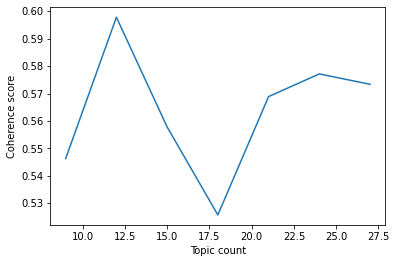

In [62]:
import matplotlib.pyplot as plt

plt.plot(topic_number_list, coherence_score_list, "-"),
plt.xlabel("Topic count")
plt.ylabel("Coherence score")

plt.show()

In [64]:
pyLDAvis.enable_notebook()
figure = pyLDAvis.gensim_models.prepare(lda_model, document_term_matrix, word_list, mds='mmds')
pyLDAvis.display(figure)

c:\users\tyyp-\appdata\local\programs\python\python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
